# Gradient Descent

## Used to find the root of an equation

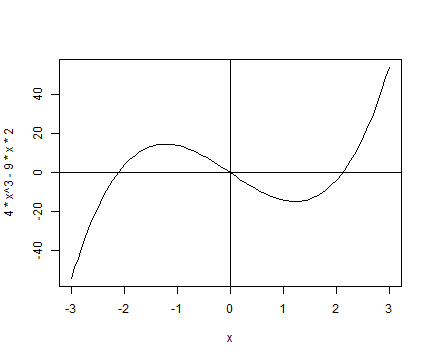

RObject{NilSxp}
NULL


In [8]:
using RCall
reval("curve(4*x^3-9*x*2, -3, 3);abline(h=0, v=0)")

In [10]:
xc = 6
alpha = 0.01
stop_precision = 0.00001
delta = 1

function df(x)
   return 4x^3 - 9x^2
end

while delta > stop_precision
    xprev = xc
    xc -= alpha * df(xprev) # Picard's Method
#    println(xc)
    delta = abs(xc - xprev)
end

println("The local minimum occurs at $xc")

The local minimum occurs at 2.2499646074278457


In [11]:
df(2.25)

0.0

## Gradient Descent for a Linear System

Here we will be minimizing the mean square error of $Ax=b$.  That is, we seek to minimize
$$ MSE = \frac{1}{n} \sum_{i=1}^n \left ( b_i - A_i x \right )^2 $$
It turns out the gradient of $MSE$ can be written
$$ \nabla MSE = A'(b-Ax)$$
This means that each iteration of our gradient descent can be written as
$$x^+ = x^c + \alpha A'(b-Ax^c)$$

In [24]:
x = [0,0]   # initial guess
alpha = 0.01    # fixed step size

0.01

In [25]:
include("gen_eigm.jl")
using LinearAlgebra

A = gen_eigm([1,2])

2×2 Array{Float64,2}:
  1.69751   -0.459338
 -0.459338   1.30249 

In [28]:
b = rand(2)
norm(A*x-b)

0.909601642647314

In [29]:
xnext = x + alpha*A'*(b-A*x)

2-element Array{Float64,1}:
 0.006022973776384799
 0.014891049242924484

In [30]:
x = xnext

2-element Array{Float64,1}:
 0.006022973776384799
 0.014891049242924484

In [31]:
norm(A*x-b)

0.8987747905118636

In [35]:
for i in 1:10
    xnext = x + alpha*A'*(b-A*x)
    x = xnext
    println(norm(A*x-b))
end

0.28547408699071375
0.2826187574405508
0.27979202185723606
0.2769935914912188
0.274223180674564
0.2714805067767261
0.26876529016169187
0.2660772541464136
0.2634161249604611
0.26078163170682384


In [36]:
x

2-element Array{Float64,1}:
 0.24986698503218854
 0.5850328263896201 

## Pick a better alpha

In [37]:
alpha = norm(A'*(A*x-b))^2/norm(A*A'*(A*x-b))^2

0.49285293704339844

In [65]:
x = [0,0]   # initial guess
A = gen_eigm([1,2])
b = rand(2)
norm(A*x-b)

0.6405016951508659

In [66]:
alpha = norm(A'*(A*x-b))^2/norm(A*A'*(A*x-b))^2
xnext = x + alpha*A'*(b-A*x)
x = xnext

2-element Array{Float64,1}:
 0.12618332951250405
 0.26975849090142756

In [67]:
for i in 1:20
    alpha = norm(A'*(A*x-b))^2/norm(A*A'*(A*x-b))^2
    xnext = x + alpha*A'*(b-A*x)
    x = xnext
    println(norm(A*x-b))
#    println(x)
end

0.18695251323272505
0.10100359225017792
0.05456853973789979
0.029481382422034647
0.015927710612908257
0.008605158392400851
0.0046490517537590035
0.0025117123036591704
0.0013569861189977367
0.0007331298749740776
0.00039608320678809005
0.00021398924263597635
0.00011561054641843978
6.246014182076746e-5
3.374492584920202e-5
1.8231146894178925e-5
9.849620608539573e-6
5.321389087352569e-6
2.87495152801881e-6
1.5532309614512009e-6
